In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as msno

warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [2]:
data = pd.read_csv("mission_launches.csv")
data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


### preproses

In [3]:
data.drop(["Unnamed: 0", "Unnamed: 0.1"], axis = "columns", inplace = True)

In [4]:
data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [5]:
split = data.Date.str.replace(",", "").str.split(" ", 5, expand = True)
split.columns = ["hari", "bulan", "tanggal", "tahun", "jam", "kode_waktu"]

In [6]:
split

,hari,bulan,tanggal,tahun,jam,kode_waktu
0,Fri,Aug,07,2020,05:12,UTC
1,Thu,Aug,06,2020,04:01,UTC
2,Tue,Aug,04,2020,23:57,UTC
3,Thu,Jul,30,2020,21:25,UTC
4,Thu,Jul,30,2020,11:50,UTC
...,...,...,...,...,...,...
4319,Wed,Feb,05,1958,07:33,UTC
4320,Sat,Feb,01,1958,03:48,UTC
4321,Fri,Dec,06,1957,16:44,UTC
4322,Sun,Nov,03,1957,02:30,UTC


In [7]:
data_preproses = pd.concat( [data, split] ,axis= "columns")

In [8]:
data_preproses.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,kode_waktu
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,Aug,07,2020,05:12,UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,06,2020,04:01,UTC
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,04,2020,23:57,UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Jul,30,2020,21:25,UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,Jul,30,2020,11:50,UTC


In [9]:
data_preproses

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,kode_waktu
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,Aug,07,2020,05:12,UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,06,2020,04:01,UTC
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,04,2020,23:57,UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Jul,30,2020,21:25,UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,Jul,30,2020,11:50,UTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,05,1958,07:33,UTC
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,01,1958,03:48,UTC
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,06,1957,16:44,UTC
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,03,1957,02:30,UTC


In [10]:
data_preproses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
 7   hari            4324 non-null   object
 8   bulan           4324 non-null   object
 9   tanggal         4324 non-null   object
 10  tahun           4324 non-null   object
 11  jam             4198 non-null   object
 12  kode_waktu      4198 non-null   object
dtypes: object(13)
memory usage: 439.3+ KB


In [11]:
data_preproses.loc[data_preproses.jam.isnull()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,kode_waktu
106,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Thu Aug 29, 2019",Safir-1B+ | Nahid-1,StatusActive,NaN,Prelaunch Failure,Thu,Aug,29,2019,None,None
163,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Tue Feb 05, 2019",Safir-1B+ | Dousti,StatusActive,NaN,Failure,Tue,Feb,05,2019,None,None
295,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA","Sun Dec 17, 2017",New Shepard | NS-7,StatusActive,NaN,Success,Sun,Dec,17,2017,None,None
335,ISA,"Imam Khomeini Spaceport, Semnan Space Center, ...","Thu Jul 27, 2017",Simorgh | Test Flight,StatusActive,NaN,Failure,Thu,Jul,27,2017,None,None
447,Blue Origin,"Blue Origin Launch Site, West Texas, Texas, USA","Sat Apr 02, 2016",New Shepard | NS-4,StatusActive,NaN,Success,Sat,Apr,02,2016,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4303,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Tue Aug 26, 1958",NOTS-EV-1 Pilot II | Pilot-5 (R2),StatusRetired,NaN,Failure,Tue,Aug,26,1958,None,None
4304,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Mon Aug 25, 1958",NOTS-EV-1 Pilot II | Pilot-4 (R1),StatusRetired,NaN,Failure,Mon,Aug,25,1958,None,None
4306,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Fri Aug 22, 1958",NOTS-EV-1 Pilot II | Pilot-3 (D3),StatusRetired,NaN,Failure,Fri,Aug,22,1958,None,None
4308,US Navy,"Douglas F4D Skyray, Naval Air Station Point Mu...","Tue Aug 12, 1958",NOTS-EV-1 Pilot II | Pilot-2 (D2),StatusRetired,NaN,Failure,Tue,Aug,12,1958,None,None


In [12]:
data_preproses.drop("Date", axis = "columns", inplace = True)

In [13]:
for kolom in data_preproses.columns:
    print(f"isi data pada kolom {kolom} :\n{data_preproses[kolom].unique()}\n")

isi data pada kolom Organisation :
['SpaceX' 'CASC' 'Roscosmos' 'ULA' 'JAXA' 'Northrop' 'ExPace' 'IAI'
 'Rocket Lab' 'Virgin Orbit' 'VKS RF' 'MHI' 'IRGC' 'Arianespace' 'ISA'
 'Blue Origin' 'ISRO' 'Exos' 'ILS' 'i-Space' 'OneSpace' 'Landspace'
 'Eurockot' 'Land Launch' 'CASIC' 'KCST' 'Sandia' 'Kosmotras' 'Khrunichev'
 'Sea Launch' 'KARI' 'ESA' 'NASA' 'Boeing' 'ISAS' 'SRC' 'MITT' 'Lockheed'
 'AEB' 'Starsem' 'RVSN USSR' 'EER' 'General Dynamics' 'Martin Marietta'
 'Yuzhmash' 'Douglas' 'ASI' 'US Air Force' 'CNES' 'CECLES' 'RAE' 'UT'
 'OKB-586' 'AMBA' "Arm??e de l'Air" 'US Navy']

isi data pada kolom Location :
['LC-39A, Kennedy Space Center, Florida, USA'
 'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China'
 'Pad A, Boca Chica, Texas, USA'
 'Site 200/39, Baikonur Cosmodrome, Kazakhstan'
 'SLC-41, Cape Canaveral AFS, Florida, USA'
 'LC-9, Taiyuan Satellite Launch Center, China'
 'Site 31/6, Baikonur Cosmodrome, Kazakhstan'
 'LC-101, Wenchang Satellite Launch Center, China'
 'SLC-40, C

<AxesSubplot:>

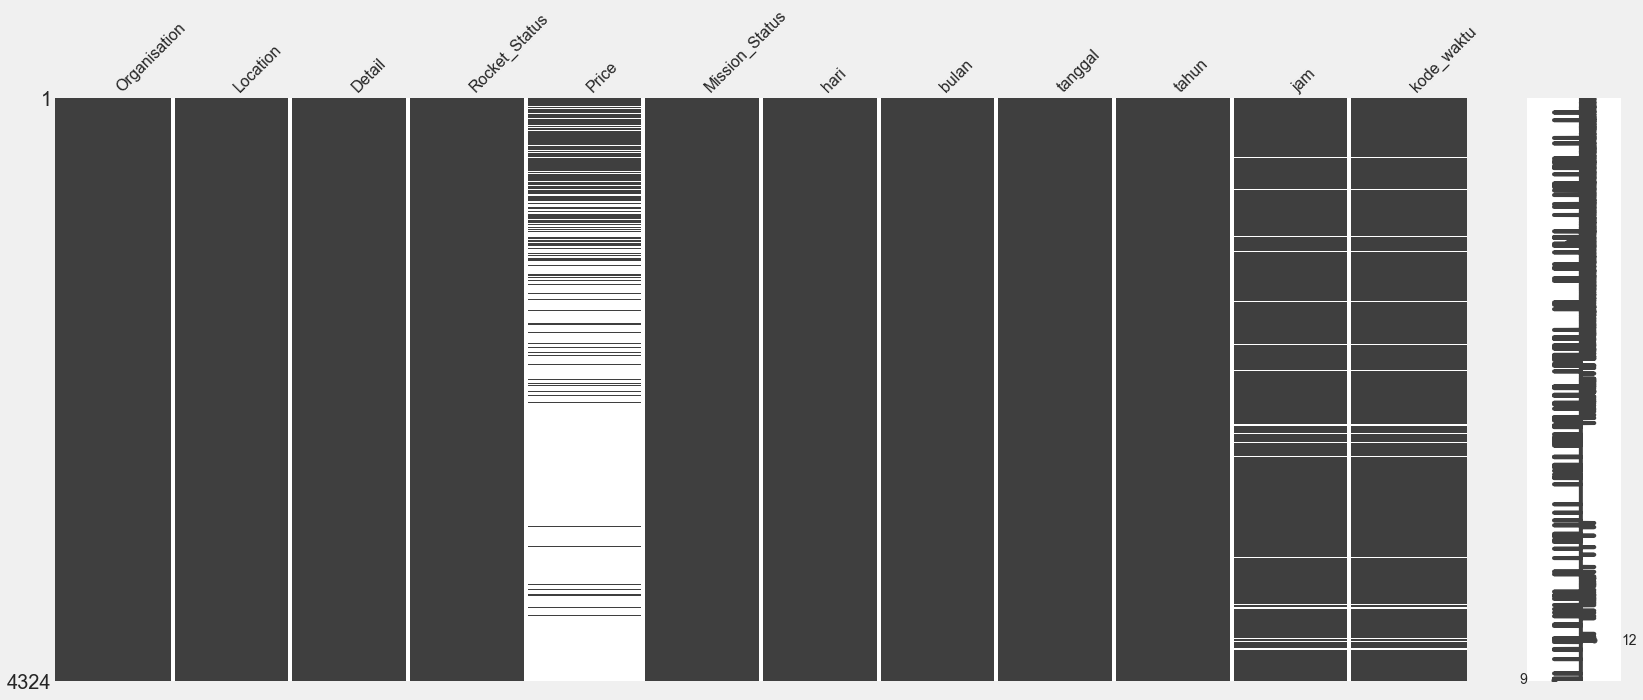

In [14]:
msno.matrix(data_preproses)

In [238]:
data_preproses.isnull().sum()

Organisation         0
Location             0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
hari                 0
bulan                0
tanggal              0
tahun                0
jam                126
Dekade               0
dtype: int64

In [15]:
data_preproses

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,kode_waktu
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,Fri,Aug,07,2020,05:12,UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,06,2020,04:01,UTC
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,04,2020,23:57,UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Thu,Jul,30,2020,21:25,UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,Thu,Jul,30,2020,11:50,UTC
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,05,1958,07:33,UTC
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,01,1958,03:48,UTC
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,06,1957,16:44,UTC
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,03,1957,02:30,UTC


In [16]:
data_preproses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Detail          4324 non-null   object
 3   Rocket_Status   4324 non-null   object
 4   Price           964 non-null    object
 5   Mission_Status  4324 non-null   object
 6   hari            4324 non-null   object
 7   bulan           4324 non-null   object
 8   tanggal         4324 non-null   object
 9   tahun           4324 non-null   object
 10  jam             4198 non-null   object
 11  kode_waktu      4198 non-null   object
dtypes: object(12)
memory usage: 405.5+ KB


In [17]:
data_preproses.Price = data_preproses.Price.str.replace(",", "")

In [18]:
data_preproses.tahun = data_preproses.tahun.astype("int")
data_preproses.tanggal = data_preproses.tanggal.astype("int")
data_preproses.Price = data_preproses.Price.astype("float")

In [19]:
data_preproses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Detail          4324 non-null   object 
 3   Rocket_Status   4324 non-null   object 
 4   Price           964 non-null    float64
 5   Mission_Status  4324 non-null   object 
 6   hari            4324 non-null   object 
 7   bulan           4324 non-null   object 
 8   tanggal         4324 non-null   int32  
 9   tahun           4324 non-null   int32  
 10  jam             4198 non-null   object 
 11  kode_waktu      4198 non-null   object 
dtypes: float64(1), int32(2), object(9)
memory usage: 371.7+ KB


In [20]:
# binning untuk pemberian kategori baru dalam penentuan kolom baru yaitu pada Dekade berapa misi tersebut dilaksanakan

dekade = pd.cut(data_preproses.tahun, bins = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], 
                labels= ["50's", "60's", "70's", "80's", "90's", "00's", "10's"])

data_preproses["Dekade"] = dekade

In [21]:
data_preproses.head()

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,kode_waktu,Dekade
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05:12,UTC,10's
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04:01,UTC,10's
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23:57,UTC,10's
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21:25,UTC,10's
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11:50,UTC,10's


In [22]:
data_preproses.drop(["kode_waktu"], axis = "columns", inplace = True)

In [23]:
# mengganti waktu jam hanya jam saja, tidak pakai menit

data_preproses.jam = data_preproses.jam.str.slice(0, 2)

In [24]:
data_preproses.head()

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05,10's
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04,10's
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23,10's
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21,10's
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11,10's


### Mencari tren peluncuran tiap tahun dan dekade

<AxesSubplot:title={'center':'Jumlah Peluncuran Tiap Dekade'}, xlabel='Dekade'>

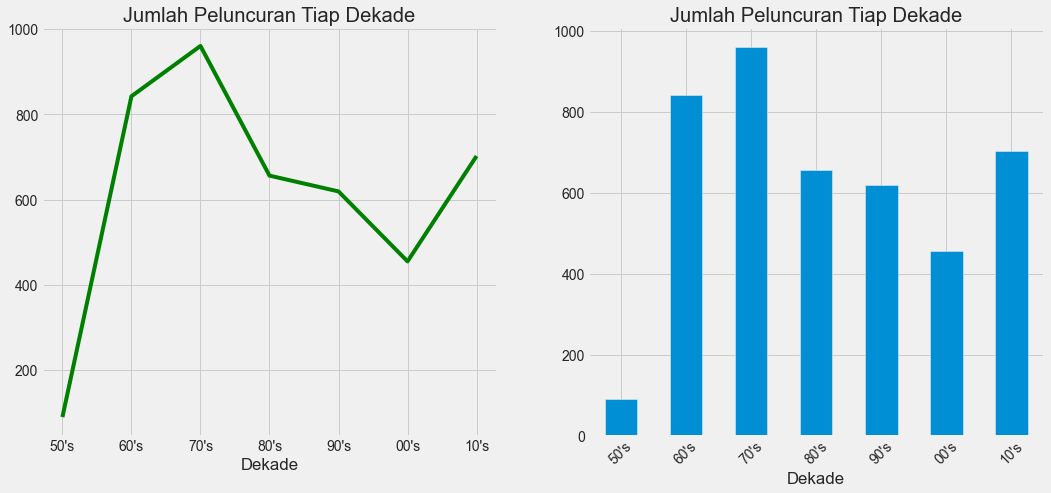

In [25]:
fig, axes = plt.subplots(nrows=1, ncols= 2, figsize = (16, 7))

data_preproses.groupby("Dekade").Organisation.count().plot( title = "Jumlah Peluncuran Tiap Dekade", ax = axes[0], color = "green")

data_preproses.groupby("Dekade").Organisation.count().plot(kind = "bar",
                                                           title = "Jumlah Peluncuran Tiap Dekade", rot = 45,
                                                           ax = axes[1])

<AxesSubplot:xlabel='tahun'>

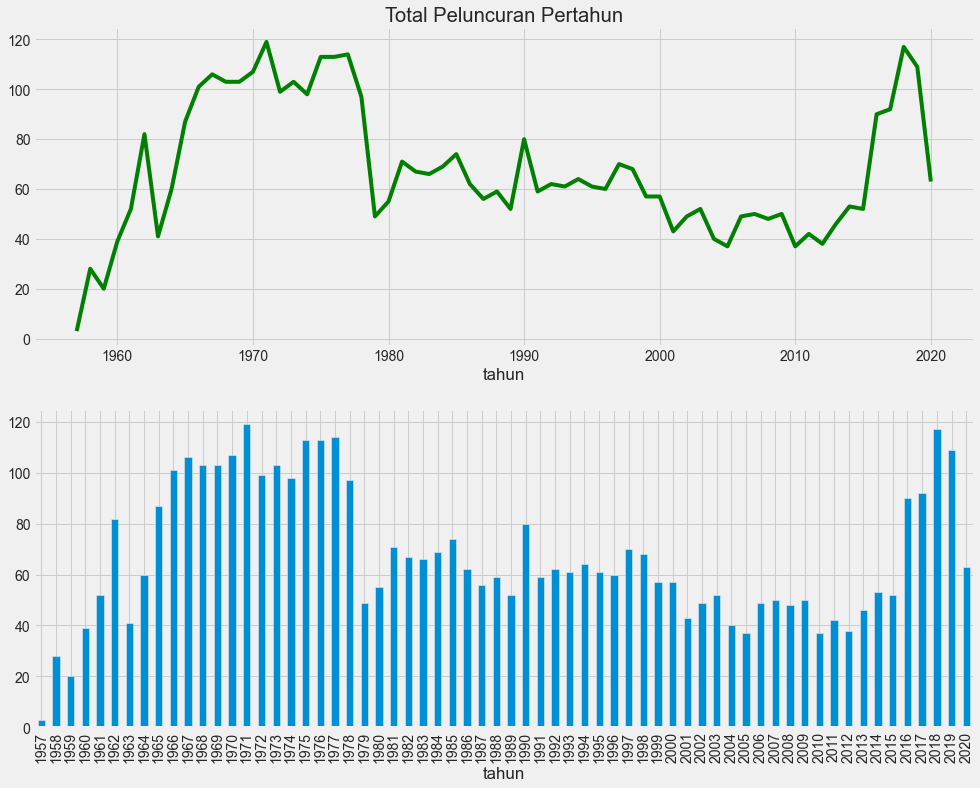

In [26]:
fig, ax = plt.subplots(nrows= 2, ncols= 1, figsize = (15, 12))

data_preproses.groupby("tahun").tahun.count().plot(ax = ax[0],
                                                   title = "Total Peluncuran Pertahun", color = "green")

data_preproses.groupby("tahun").tahun.count().plot(kind = "bar" ,ax = ax[1])

### Mencari pola presentase misi sukses dari tahun ke tahun

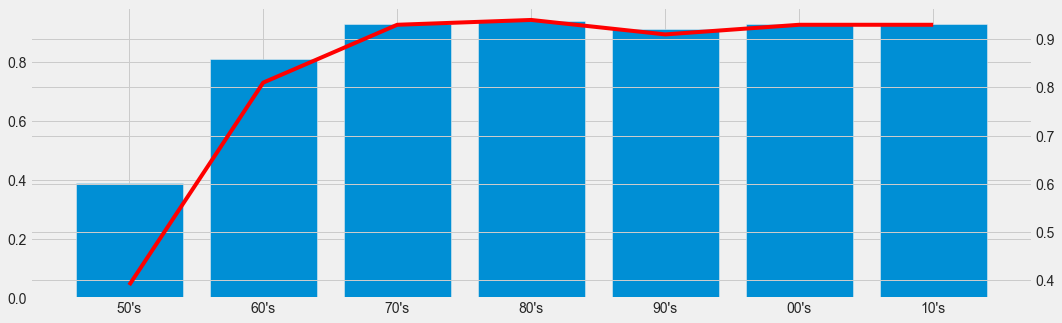

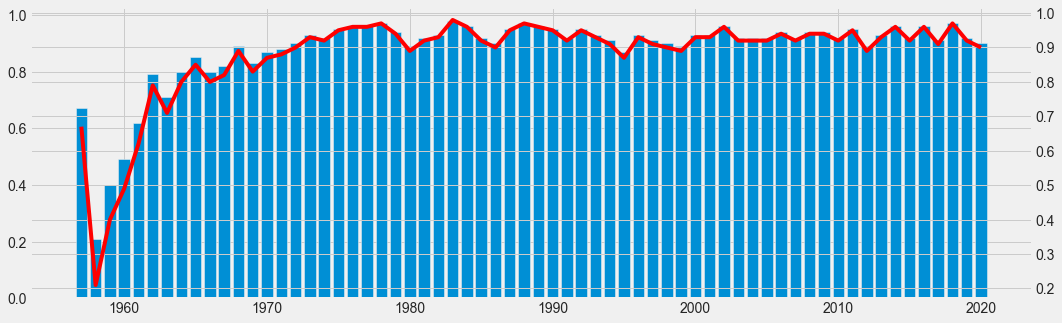

In [247]:
# mencari presentase Success pada tiap tahun
dekade_success = data_preproses.groupby(["Dekade", "Mission_Status"]).Mission_Status.count().unstack()
dekade_success["Total"] = dekade_success.sum(axis = "columns")
dekade_success["Success_rate"] = (dekade_success.Success / dekade_success.Total).round(2)

tahun_success = data_preproses.groupby(["tahun", "Mission_Status"]).Mission_Status.count().unstack()
tahun_success["Total"] = tahun_success.sum(axis = "columns")
tahun_success["Success_rate"] = (tahun_success.Success / tahun_success.Total).round(2)

# ----------------------------------------------

# plotting data

fig, ax = plt.subplots(figsize = (16, 5))

ax.bar(dekade_success.index, dekade_success.Success_rate)
ax2 = ax.twinx()
ax2.plot(dekade_success.index, dekade_success.Success_rate, color = "red")


fig, ax = plt.subplots(figsize = (16, 5))

ax.bar(tahun_success.index, tahun_success.Success_rate)
ax2 = ax.twinx()
ax2.plot(tahun_success.index, tahun_success.Success_rate, color = "red")

In [245]:
dekade_success

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Success_rate
Dekade,,,,,,
50's,50,5,0,35,90,0.39
60's,119,36,1,686,842,0.81
70's,52,14,0,894,960,0.93
80's,23,15,0,618,656,0.94
90's,40,13,0,566,619,0.91
00's,23,7,1,424,455,0.93
10's,32,12,2,656,702,0.93


In [250]:
tahun_success.fillna(0)

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Success_rate
tahun,,,,,,
1957,1.0,0.0,0.0,2.0,3.0,0.67
1958,20.0,2.0,0.0,6.0,28.0,0.21
1959,9.0,3.0,0.0,8.0,20.0,0.40
1960,20.0,0.0,0.0,19.0,39.0,0.49
1961,17.0,3.0,0.0,32.0,52.0,0.62
...,...,...,...,...,...,...
2016,2.0,1.0,1.0,86.0,90.0,0.96
2017,6.0,2.0,0.0,84.0,92.0,0.91
2018,2.0,2.0,0.0,113.0,117.0,0.97


In [49]:
# Mencari presentase misi sukses pada tiap dekade

dekade_mission = data_preproses.groupby(["Dekade", "Mission_Status"]).Mission_Status.count().unstack()
dekade_mission["Total"] = dekade_mission.sum(axis = "columns")

for kolom in dekade_mission:
    if kolom == "Total":
        break
    else:
        dekade_mission[f"Presentase_{kolom}"] = dekade_mission[kolom] / dekade_mission.Total

dekade_mission = dekade_mission.round(2)

In [50]:
dekade_mission

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Presentase_Failure,Presentase_Partial Failure,Presentase_Prelaunch Failure,Presentase_Success
Dekade,,,,,,,,,
50's,50,5,0,35,90,0.56,0.06,0.0,0.39
60's,119,36,1,686,842,0.14,0.04,0.0,0.81
70's,52,14,0,894,960,0.05,0.01,0.0,0.93
80's,23,15,0,618,656,0.04,0.02,0.0,0.94
90's,40,13,0,566,619,0.06,0.02,0.0,0.91
00's,23,7,1,424,455,0.05,0.02,0.0,0.93
10's,32,12,2,656,702,0.05,0.02,0.0,0.93


In [202]:
# Mrncari Presentase misi pada tiap Tahun

tahun_mission = data_preproses.groupby(["tahun", "Mission_Status"]).Mission_Status.count().unstack().fillna(0).astype("int")
tahun_mission['Total'] = tahun_mission.sum(axis = "columns")

for kolom in tahun_mission.columns:
    if kolom == "Total":
        break
    else:
        tahun_mission[f"Presentase_{kolom}"] = (tahun_mission[kolom] / tahun_mission["Total"]).round(2)
    
tahun_mission

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Presentase_Failure,Presentase_Partial Failure,Presentase_Prelaunch Failure,Presentase_Success
tahun,,,,,,,,,
1957,1,0,0,2,3,0.33,0.00,0.00,0.67
1958,20,2,0,6,28,0.71,0.07,0.00,0.21
1959,9,3,0,8,20,0.45,0.15,0.00,0.40
1960,20,0,0,19,39,0.51,0.00,0.00,0.49
1961,17,3,0,32,52,0.33,0.06,0.00,0.62
...,...,...,...,...,...,...,...,...,...
2016,2,1,1,86,90,0.02,0.01,0.01,0.96
2017,6,2,0,84,92,0.07,0.02,0.00,0.91
2018,2,2,0,113,117,0.02,0.02,0.00,0.97


<AxesSubplot:title={'center':'Presentase Success dan Gagal Misi pada tiap Tahun'}, xlabel='tahun'>

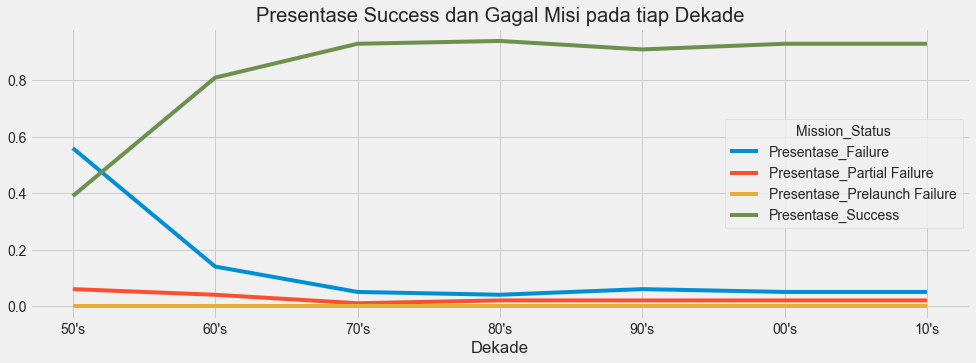

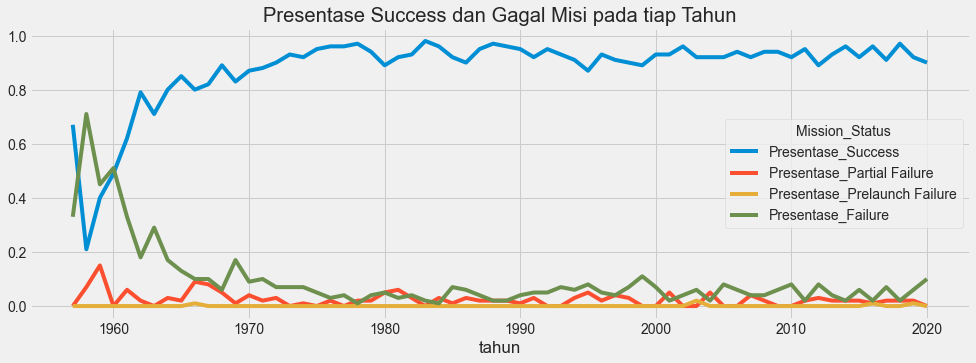

In [214]:
dekade_mission[["Presentase_Failure", "Presentase_Partial Failure",
                "Presentase_Prelaunch Failure", "Presentase_Success"]].plot(figsize = (15, 5), 
                                                                           title = "Presentase Success dan Gagal Misi pada tiap Dekade")

tahun_mission[["Presentase_Success", "Presentase_Partial Failure",
               "Presentase_Prelaunch Failure", "Presentase_Failure"]].plot(figsize = (15, 5), 
                                                                           title = "Presentase Success dan Gagal Misi pada tiap Tahun")


### Mencari tahu apakah ada waktu favorit dalam melakukan peluncuran misi

<AxesSubplot:title={'center':'Total peluncuran pada tiap hari'}, xlabel='hari'>

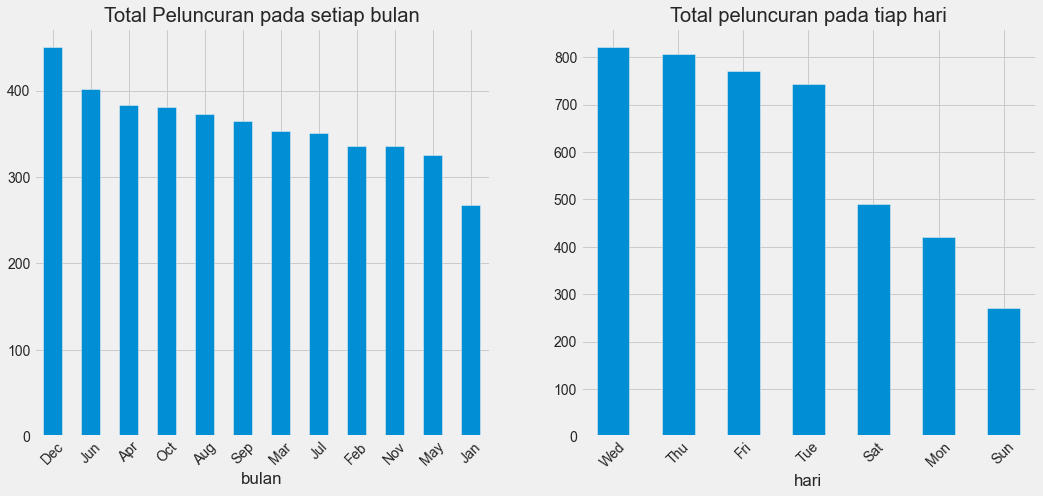

In [192]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 7))

data_preproses.groupby("bulan").bulan.count().sort_values(ascending = False).plot(kind = "bar", 
                                                                                  rot = 45,
                                                                                  title = "Total Peluncuran pada setiap bulan", 
                                                                                  ax = ax[0])

data_preproses.groupby("hari").bulan.count().sort_values(ascending = False).plot(kind = "bar", 
                                                                                 rot = 45,
                                                                                 title = "Total peluncuran pada tiap hari",
                                                                                 ax = ax[1])

<AxesSubplot:title={'center':'Jam peluncuran terfavorit'}, xlabel='jam'>

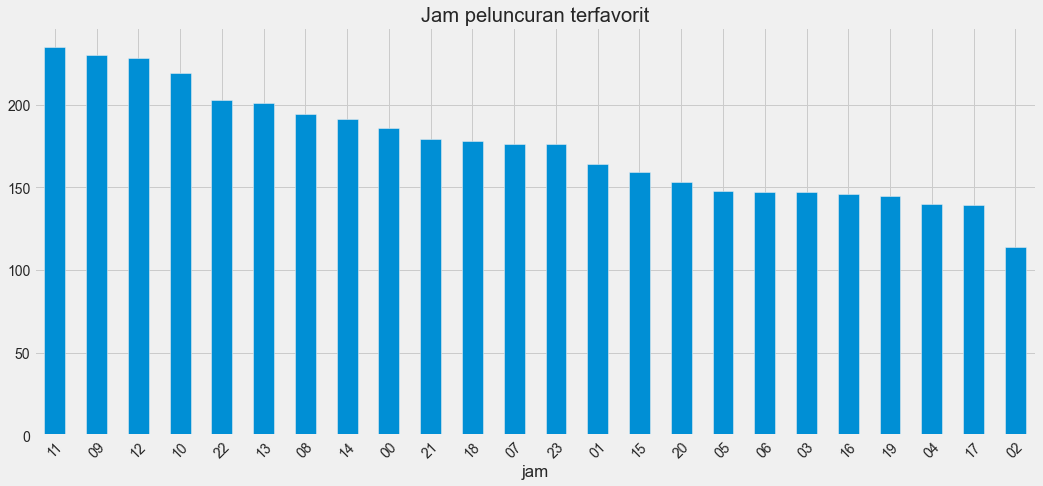

In [194]:
data_preproses.groupby("jam").jam.count().sort_values(ascending = False).plot(kind = "bar", figsize = (16, 7), rot = 45,
                                                                             title = "Jam peluncuran terfavorit")

In [30]:
bulan_hari = data_preproses.groupby(["bulan", "hari"]).hari.count().unstack()
bulan_hari["Total"] = bulan_hari.sum(axis = "columns")
bulan_hari = bulan_hari.sort_values("Total", ascending = False)
for kolom in bulan_hari:
    if kolom == "Total":
        break
    else:
        bulan_hari[f"Presentase_{kolom}"] = (bulan_hari[kolom] / bulan_hari["Total"]).round(2)
bulan_hari

hari,Fri,Mon,Sat,Sun,Thu,Tue,Wed,Total,Presentase_Fri,Presentase_Mon,Presentase_Sat,Presentase_Sun,Presentase_Thu,Presentase_Tue,Presentase_Wed
bulan,,,,,,,,,,,,,,,
Dec,78,45,58,32,76,76,85,450,0.17,0.10,0.13,0.07,0.17,0.17,0.19
Jun,74,26,49,24,74,71,84,402,0.18,0.06,0.12,0.06,0.18,0.18,0.21
Apr,67,41,46,24,68,52,85,383,0.17,0.11,0.12,0.06,0.18,0.14,0.22
Oct,70,48,44,18,71,60,70,381,0.18,0.13,0.12,0.05,0.19,0.16,0.18
Aug,68,35,38,20,71,68,73,373,0.18,0.09,0.10,0.05,0.19,0.18,0.20
Sep,66,38,48,23,65,66,59,365,0.18,0.10,0.13,0.06,0.18,0.18,0.16
Mar,73,33,43,18,74,56,56,353,0.21,0.09,0.12,0.05,0.21,0.16,0.16
Jul,73,39,21,19,72,55,72,351,0.21,0.11,0.06,0.05,0.21,0.16,0.21
Feb,46,31,40,24,56,71,68,336,0.14,0.09,0.12,0.07,0.17,0.21,0.20


In [31]:
data_preproses.groupby(["Dekade", "bulan"]).bulan.count().unstack()

bulan,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Dekade,,,,,,,,,,,,
50's,9,15,11,7,1,4,7,4,5,9,10,8
60's,88,70,77,59,44,67,81,71,50,75,94,66
70's,86,65,111,74,58,85,92,76,90,68,80,75
80's,47,62,54,64,50,44,68,60,44,46,56,61
90's,53,68,73,48,36,50,41,49,47,50,52,52
00's,49,37,42,32,22,35,50,34,34,32,42,46
10's,51,56,82,52,57,66,63,59,56,56,47,57


### Mencari secara general organisasi dengan misi sukses paling banyak

In [233]:
all_organisation = data_preproses.groupby(["Organisation", "Mission_Status"]).Mission_Status.count().unstack().fillna(0)
all_organisation = all_organisation.astype("int")
all_organisation.sort_values("Success", ascending = False)

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success
Organisation,,,,
RVSN USSR,121,41,1,1614
Arianespace,7,3,0,269
CASC,14,6,0,231
General Dynamics,37,11,0,203
VKS RF,7,6,0,188
NASA,11,6,0,186
ULA,0,1,0,139
Boeing,3,2,0,131
US Air Force,30,2,0,129


Text(0.5, 1.0, 'Pareto Diagram Peluncuran Sukses Semua Organisasi')

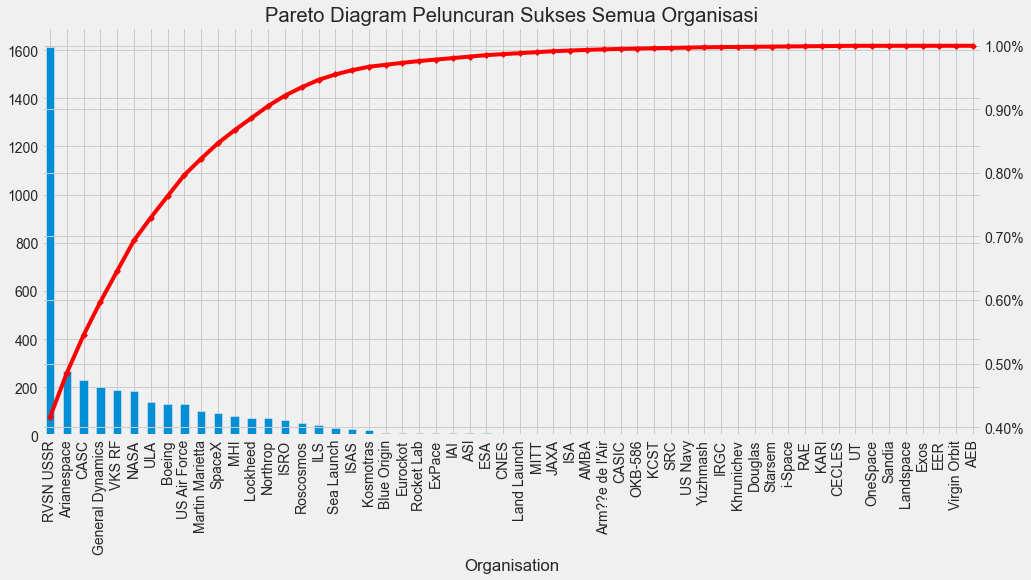

In [232]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize = (12, 7))

all_organisation["Success"].sort_values(ascending = False).plot(kind = "bar", figsize = (15, 7),
                                                                rot = 90, ax = ax)
Succes_Normalize_Total_all_org = (all_organisation.Success / all_organisation.Success.sum(axis = "index"))


ax2 = ax.twinx()
ax2.plot(all_organisation["Success"].sort_values(ascending = False).index, 
         Succes_Normalize_Total_all_org.sort_values(ascending = False).cumsum(), marker = "D", color = "r", ms = 4)
ax2.yaxis.set_major_formatter(PercentFormatter())
plt.title("Pareto Diagram Peluncuran Sukses Semua Organisasi")

### Mencari top10 organisasi dengan misi terbanyak

<AxesSubplot:title={'center':'10 Organisasi Misi Terbanyak'}, xlabel='Organisation'>

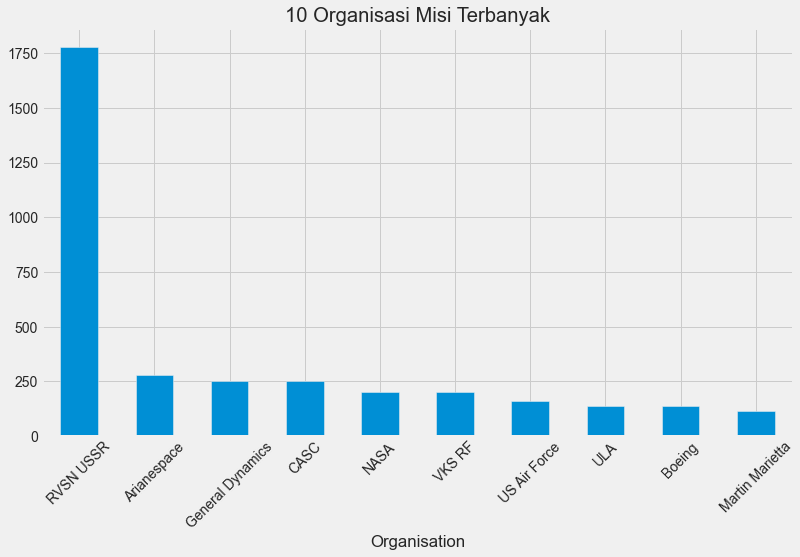

In [35]:
top10_organisation_group = data_preproses.groupby(["Organisation"]).Organisation.count().sort_values(ascending = False).head(10)
top10_organisation_group.plot(kind = "bar",  figsize = (12, 7),rot = 45,
                             title = "10 Organisasi Misi Terbanyak")

In [257]:
all_organisation["Total"] = all_organisation.sum(axis = "columns")
all_organisation.sort_values("Total", inplace = True, ascending = False)

### Melihat lebih rinci presentase sukses dan gagal pada top10 dengan organisasi dengan total misi terbanyak

In [37]:
top10_organisation = all_organisation.head(10)
top10_organisation

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total
Organisation,,,,,
RVSN USSR,121,41,1,1614,1777
Arianespace,7,3,0,269,279
General Dynamics,37,11,0,203,251
CASC,14,6,0,231,251
NASA,11,6,0,186,203
VKS RF,7,6,0,188,201
US Air Force,30,2,0,129,161
ULA,0,1,0,139,140
Boeing,3,2,0,131,136


In [38]:
for kolom in top10_organisation:
    if kolom == "Total":
        break
    else:
        top10_organisation[f"Presentase_{kolom}"] = all_organisation[kolom] / all_organisation.Total
        
top10_organisation = top10_organisation.sort_values("Presentase_Success", ascending = False).round(2)

In [39]:
top10_organisation

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total,Presentase_Failure,Presentase_Partial Failure,Presentase_Prelaunch Failure,Presentase_Success
Organisation,,,,,,,,,
ULA,0,1,0,139,140,0.00,0.01,0.0,0.99
Arianespace,7,3,0,269,279,0.03,0.01,0.0,0.96
Boeing,3,2,0,131,136,0.02,0.01,0.0,0.96
VKS RF,7,6,0,188,201,0.03,0.03,0.0,0.94
CASC,14,6,0,231,251,0.06,0.02,0.0,0.92
NASA,11,6,0,186,203,0.05,0.03,0.0,0.92
RVSN USSR,121,41,1,1614,1777,0.07,0.02,0.0,0.91
Martin Marietta,11,3,0,100,114,0.10,0.03,0.0,0.88
General Dynamics,37,11,0,203,251,0.15,0.04,0.0,0.81


Text(0.5, 1.0, 'Presentase Success Tertinggi pada Top 10 Misi berhasil terbanyak')

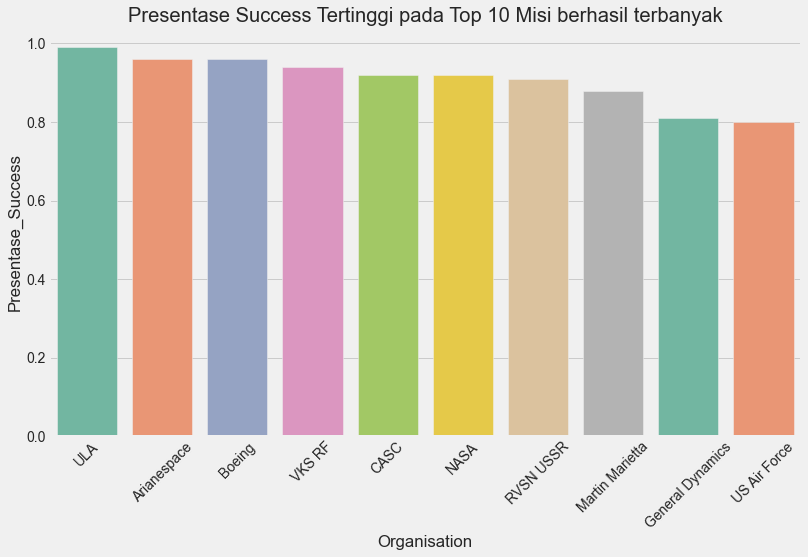

In [264]:
plt.figure(figsize= (12, 7))
plt.xticks(rotation = 45)
sns.barplot(x = top10_organisation.index, y = top10_organisation.Presentase_Success, palette=  "Set2")
plt.title("Presentase Success Tertinggi pada Top 10 Misi berhasil terbanyak")

In [231]:
data_preproses.loc[(data_preproses.Organisation == "US Air Force") & (data_preproses.Mission_Status != "Success")]

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade
3130,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",Titan III(24)B | OPS 4018,StatusRetired,NaN,Failure,Tue,Jun,26,1973,None,70's
3236,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",Titan III(24)B | OPS 6574,StatusRetired,NaN,Failure,Sat,May,20,1972,15,70's
3758,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",Titan IIIB | OPS 4282,StatusRetired,59.00,Partial Failure,Tue,Jun,20,1967,16,60's
3779,US Air Force,"SLC-4W, Vandenberg AFB, California, USA",Titan IIIB | OPS 4243,StatusRetired,59.00,Failure,Wed,Apr,26,1967,None,60's
4020,US Air Force,"SLC-20, Cape Canaveral AFS, Florida, USA",Titan IIIA | Transtage 1,StatusRetired,63.23,Failure,Tue,Sep,1,1964,15,60's
4072,US Air Force,"SLC-5, Vandenberg AFB, California, USA",Scout X-2B | DSAP-1 F5 (Program 35),StatusRetired,NaN,Failure,Fri,Sep,27,1963,11,60's
4090,US Air Force,"SLC-5, Vandenberg AFB, California, USA",Scout X-2M | DSAP-1 F4 (Program 35),StatusRetired,NaN,Failure,Fri,Apr,26,1963,None,60's
4094,US Air Force,"SLC-5, Vandenberg AFB, California, USA",Scout X-3 | Transit-5A 2,StatusRetired,NaN,Failure,Fri,Apr,5,1963,03,60's
4158,US Air Force,"SLC-5, Vandenberg AFB, California, USA",Scout X-2M | DSAP-1 F1 (Program 35),StatusRetired,NaN,Failure,Thu,May,24,1962,None,60's
4160,US Air Force,"SLC-17B, Cape Canaveral AFS, Florida, USA",Thor-DM21 Ablestar | ANNA 1A,StatusRetired,NaN,Failure,Thu,May,10,1962,12,60's


### Mencari top3 organisasi dengan jumlah misi terbanyak pada tiap dekade

In [41]:
data_preproses

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05,10's
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04,10's
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23,10's
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21,10's
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11,10's
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,5,1958,07,50's
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,1,1958,03,50's
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,6,1957,16,50's
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,3,1957,02,50's


In [266]:
# mencari 3 organisasi dengan misi terbanyak pada tiap Dekade

dekade_org = data_preproses.groupby(["Dekade", "Organisation"]).tahun.count().to_frame().reset_index().set_index("Dekade")
dekade_org

dekade_top3_org = pd.DataFrame()

for index in dekade_org.index.unique():
    top3 = dekade_org.loc[index, :].sort_values("tahun", ascending = False).head(3)
    dekade_top3_org = pd.concat([dekade_top3_org, top3], axis = "index")

In [267]:
dekade_top3_org.Organisation = dekade_top3_org.index.to_frame().Dekade.astype("str") + " " + dekade_top3_org.Organisation
dekade_top3_org.columns = ["Organisation", "Jumlah Misi"]
dekade_top3_org

,Organisation,Jumlah Misi
Dekade,,
50's,50's US Air Force,33
50's,50's RVSN USSR,20
50's,50's US Navy,17
60's,60's RVSN USSR,517
60's,60's General Dynamics,131
60's,60's US Air Force,103
70's,70's RVSN USSR,767
70's,70's General Dynamics,60
70's,70's Martin Marietta,53


<Figure size 1152x504 with 0 Axes>

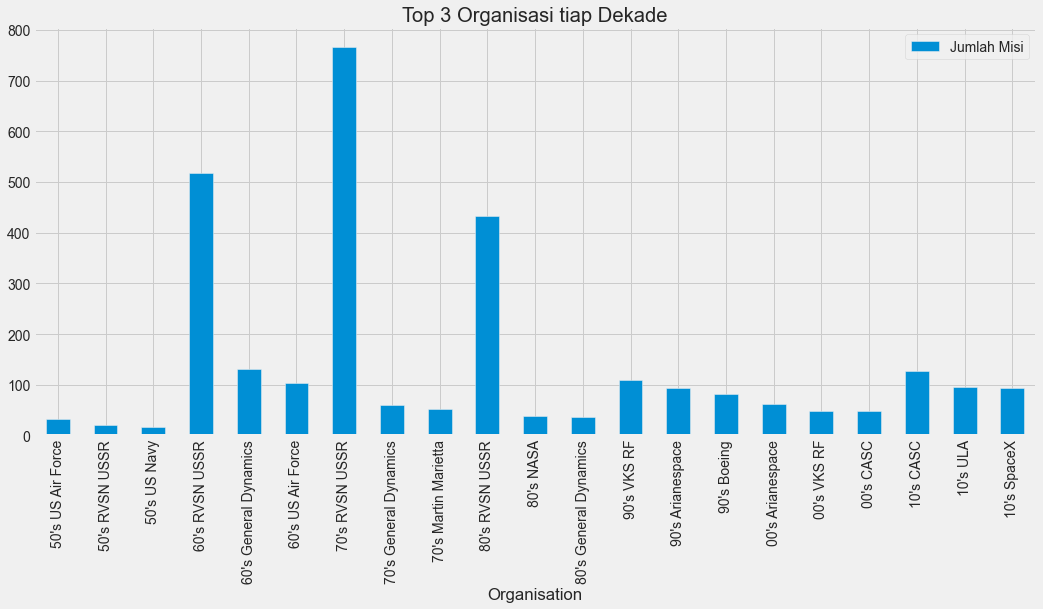

In [269]:
plt.figure(figsize = (16, 7))
dekade_top3_org.plot(x = "Organisation" ,kind = "bar", figsize = (16, 7), title = "Top 3 Organisasi tiap Dekade")
plt.show()

In [46]:
all_organisation_corr = all_organisation.corr()
mask1 = all_organisation_corr > 0.3
mask2 = all_organisation_corr < -0.3

all_organisation_corr.fillna(0, inplace = True)
all_organisation_corr

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success,Total
Mission_Status,,,,,
Failure,1.000000,0.961614,0.455350,0.947727,0.955503
Partial Failure,0.961614,1.000000,0.424294,0.973749,0.977352
Prelaunch Failure,0.455350,0.424294,1.000000,0.455294,0.457218
Success,0.947727,0.973749,0.455294,1.000000,0.999668
Total,0.955503,0.977352,0.457218,0.999668,1.000000


<AxesSubplot:xlabel='Mission_Status', ylabel='Mission_Status'>

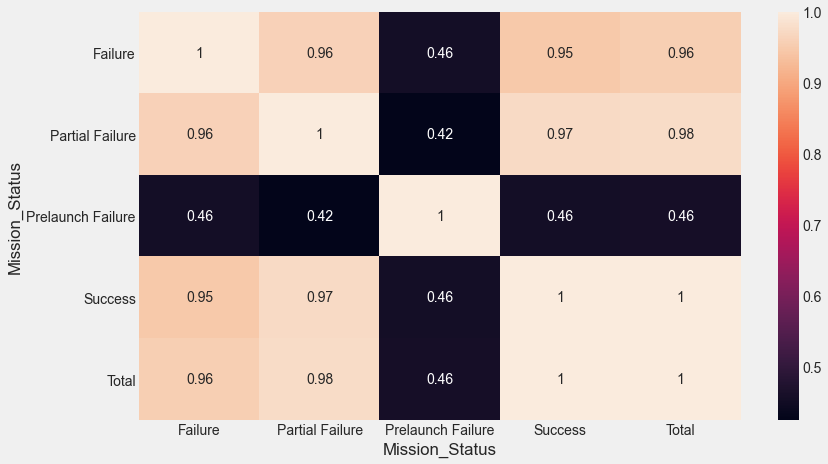

In [47]:
plt.figure(figsize = (12, 7))
sns.heatmap(all_organisation_corr[mask1 | mask2], annot= True)

### Mencari tren pola biaya misi dari tahun ke tahun

In [56]:
data_preproses

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05,10's
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04,10's
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23,10's
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21,10's
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11,10's
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,5,1958,07,50's
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,1,1958,03,50's
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,6,1957,16,50's
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,3,1957,02,50's


In [296]:
biaya_tahun_mean = data_preproses.groupby(["tahun"]).Price.mean().fillna(0).round(2).to_frame()
biaya_tahun_median = data_preproses.groupby(["tahun"]).Price.median().fillna(0).round(2).to_frame()
biaya_dekade_mean = data_preproses.groupby(["Dekade"]).Price.mean().fillna(0).round(2).to_frame()
biaya_dekade_median = data_preproses.groupby(["Dekade"]).Price.median().fillna(0).round(2).to_frame()

<AxesSubplot:title={'center':'Median biaya misi tiap Dekade'}, xlabel='Dekade'>

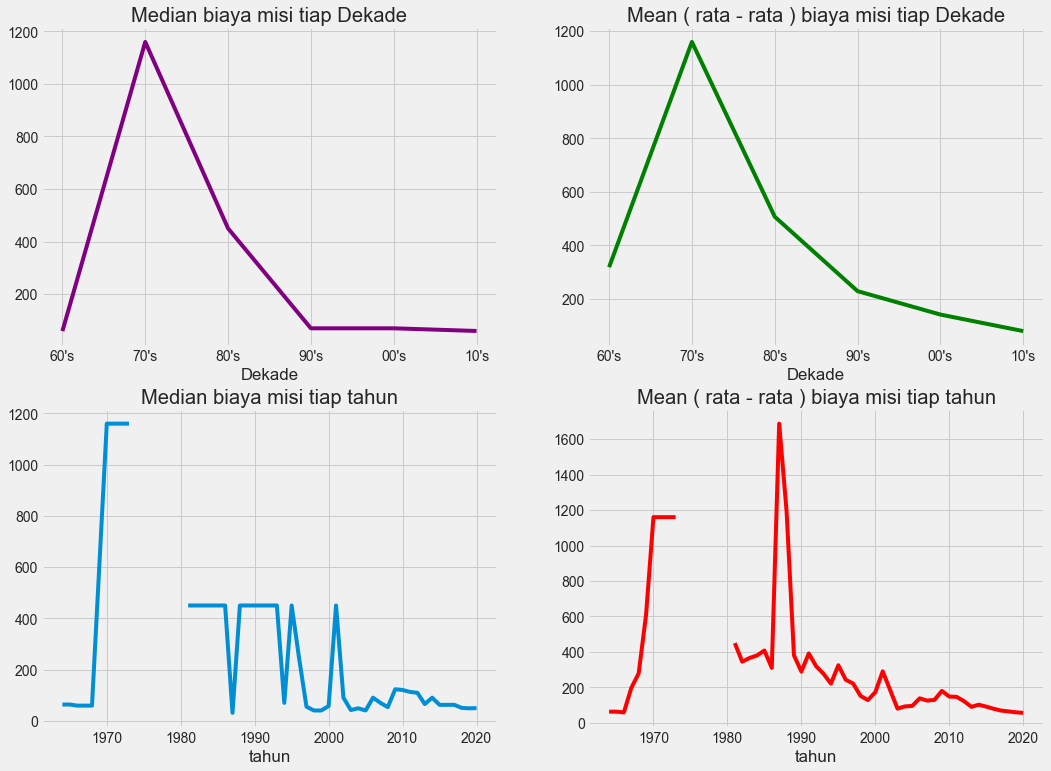

In [287]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (16, 12))

data_preproses.groupby(["tahun"]).Price.median().plot(ax = ax[1][0], title = "Median biaya misi tiap tahun")

data_preproses.groupby(["tahun"]).Price.mean().plot(ax = ax[1][1], color = "red", title = "Mean ( rata - rata ) biaya misi tiap tahun")

data_preproses.groupby(['Dekade']).Price.mean().plot(ax = ax[0][1], title = "Mean ( rata - rata ) biaya misi tiap Dekade", color = "green")

data_preproses.groupby(['Dekade']).Price.median().plot(ax = ax[0][0], title = "Median biaya misi tiap Dekade", color = "purple")

In [341]:
mean_org = data_preproses.groupby(["Dekade", "Organisation"]).Price.mean().fillna(0).round(2).to_frame().reset_index().set_index("Dekade")
median_org =  data_preproses.groupby(["Dekade", "Organisation"]).Price.median().fillna(0).round(2).to_frame().reset_index().set_index("Dekade")

top3_biaya_tinggi_dekade_mean = pd.DataFrame()
top3_biaya_tinggi_dekade_median = pd.DataFrame()

for index in a.index.unique():
    if index == "50's":
        pass
    else:
        top3_mean = mean_org.loc[index, :].sort_values("Price", ascending = False).head(3)
        top3_biaya_tinggi_dekade_mean =  pd.concat([top3_biaya_tinggi_dekade_mean, top3_mean], axis = "index")
        
        top3_median = median_org.loc[index, :].sort_values("Price", ascending = False).head(3)
        top3_biaya_tinggi_dekade_median = pd.concat([top3_biaya_tinggi_dekade_median, top3_median], axis = "index")

In [342]:
top3_biaya_tinggi_dekade_median.Organisation = top3_biaya_tinggi_dekade_median.index.to_frame().Dekade.astype("str") + " " + top3_biaya_tinggi_dekade_median.Organisation
top3_biaya_tinggi_dekade_median.columns = ["Organisation", "Median"]
top3_biaya_tinggi_dekade_median

,Organisation,Median
Dekade,,
60's,60's NASA,1160.0
60's,60's US Air Force,59.0
60's,60's AEB,0.0
70's,70's NASA,1160.0
70's,70's AEB,0.0
70's,70's AMBA,0.0
80's,80's RVSN USSR,5000.0
80's,80's NASA,450.0
80's,80's Martin Marietta,136.6


In [344]:
top3_biaya_tinggi_dekade_mean.Organisation = top3_biaya_tinggi_dekade_mean.index.to_frame().Dekade.astype("str") + " " + top3_biaya_tinggi_dekade_mean.Organisation
top3_biaya_tinggi_dekade_mean.columns = ["Organisation", "Mean"]
top3_biaya_tinggi_dekade_mean

,Organisation,Mean
Dekade,,
60's,60's NASA,1160.00
60's,60's US Air Force,59.65
60's,60's AEB,0.00
70's,70's NASA,1160.00
70's,70's AEB,0.00
70's,70's AMBA,0.00
80's,80's RVSN USSR,5000.00
80's,80's NASA,450.00
80's,80's Martin Marietta,95.96


In [347]:
top3_biaya_tinggi_dekade["Median"] = top3_biaya_tinggi_dekade_median.Median
top3_biaya_tinggi_dekade.columns = ["Organisation", "Mean", "Median"]
top3_biaya_tinggi_dekade

,Organisation,Mean,Median
Dekade,,,
60's,60's NASA,1160.00,1160.0
60's,60's US Air Force,59.65,59.0
60's,60's AEB,0.00,0.0
70's,70's NASA,1160.00,1160.0
70's,70's AEB,0.00,0.0
70's,70's AMBA,0.00,0.0
80's,80's RVSN USSR,5000.00,5000.0
80's,80's NASA,450.00,450.0
80's,80's Martin Marietta,95.96,136.6


<AxesSubplot:xlabel='Organisation'>

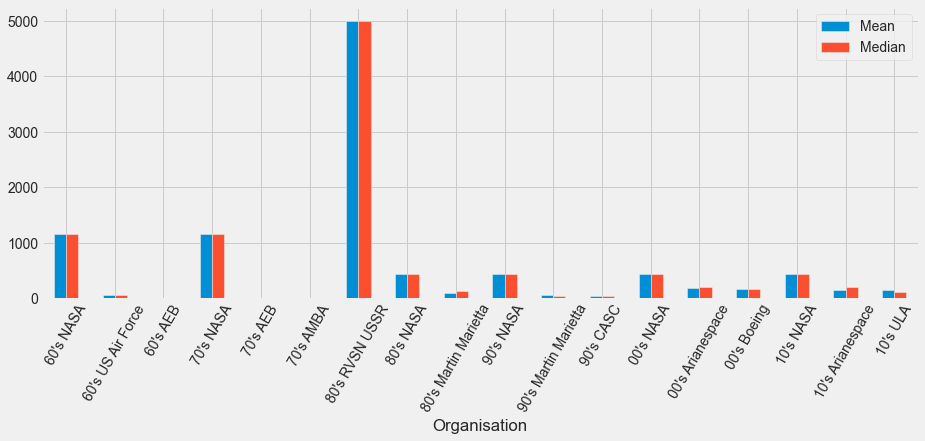

In [354]:
top3_biaya_tinggi_dekade.plot(x = "Organisation", figsize = (14, 5), kind = "bar", rot = 60)

### Mencari top3 lokasi favorit peluncuran pada tiap dekade

In [381]:
data_preproses["Spesific_Location"] = data_preproses.Location.str.split(",",n=1, expand = True)[1]
data_preproses

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade,Spesific_Location
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05,10's,"Kennedy Space Center, Florida, USA"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04,10's,"Jiuquan Satellite Launch Center, China"
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23,10's,"Boca Chica, Texas, USA"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21,10's,"Baikonur Cosmodrome, Kazakhstan"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11,10's,"Cape Canaveral AFS, Florida, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,5,1958,07,50's,"Cape Canaveral AFS, Florida, USA"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,1,1958,03,50's,"Cape Canaveral AFS, Florida, USA"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,6,1957,16,50's,"Cape Canaveral AFS, Florida, USA"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,3,1957,02,50's,"Baikonur Cosmodrome, Kazakhstan"


In [382]:
lokasi = data_preproses.groupby(["Dekade", "Spesific_Location"]).tahun.count().to_frame().reset_index().set_index("Dekade")


top3_lokasi = pd.DataFrame()

for index in lokasi.index.unique():
    top3 = lokasi.loc[index, :].sort_values("tahun", ascending = False).head(3)
    top3_lokasi = pd.concat([top3_lokasi, top3], axis = "index")

In [383]:
top3_lokasi.Spesific_Location = top3_lokasi.index.to_frame().Dekade.astype("str") + " " + top3_lokasi.Spesific_Location
top3_lokasi

,Spesific_Location,tahun
Dekade,,
50's,"50's Cape Canaveral AFS, Florida, USA",43
50's,"50's Baikonur Cosmodrome, Kazakhstan",20
50's,"50's Vandenberg AFB, California, USA",20
60's,"60's Baikonur Cosmodrome, Kazakhstan",289
60's,"60's Plesetsk Cosmodrome, Russia",162
60's,"60's Vandenberg AFB, California, USA",152
70's,"70's Plesetsk Cosmodrome, Russia",560
70's,"70's Baikonur Cosmodrome, Kazakhstan",188
70's,"70's Vandenberg AFB, California, USA",69


<AxesSubplot:title={'center':'Top 3 Tempat Peluncuran terbanyak tiap Dekade'}, xlabel='Spesific_Location'>

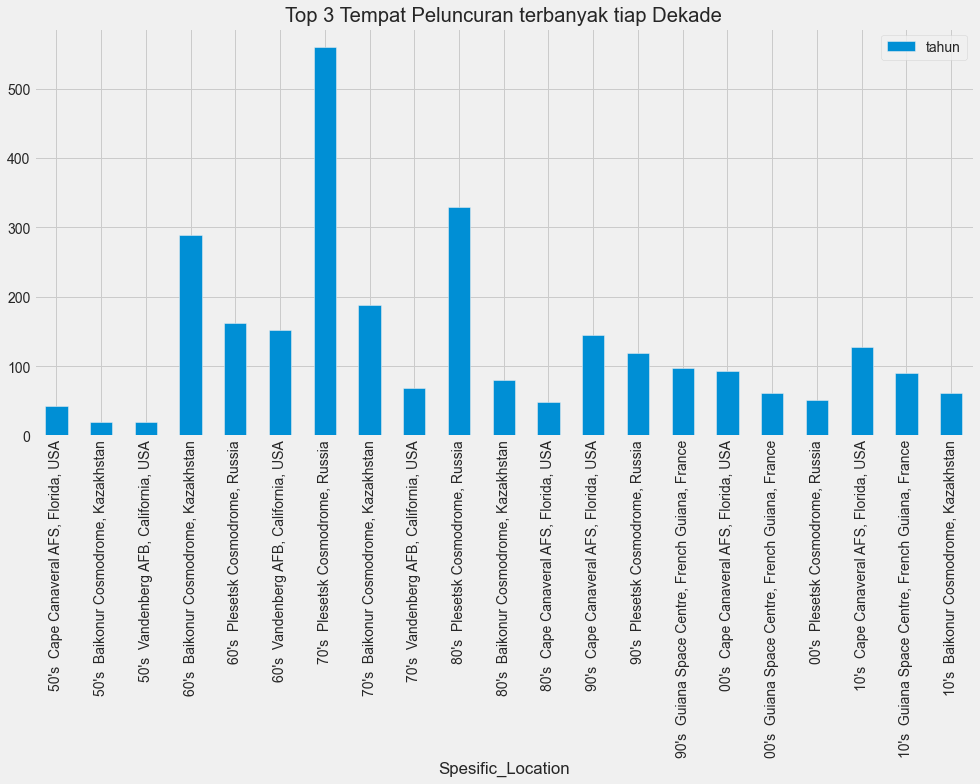

In [384]:
top3_lokasi.plot(kind = "bar", figsize = (15, 7), x = "Spesific_Location", 
                 title = "Top 3 Tempat Peluncuran terbanyak tiap Dekade")

### Mencari top3 roket pendorong dengan penggunaan terbanyak pada tiap dekade

In [386]:
data_preproses

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade,Spesific_Location
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05,10's,"Kennedy Space Center, Florida, USA"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04,10's,"Jiuquan Satellite Launch Center, China"
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23,10's,"Boca Chica, Texas, USA"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21,10's,"Baikonur Cosmodrome, Kazakhstan"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11,10's,"Cape Canaveral AFS, Florida, USA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,5,1958,07,50's,"Cape Canaveral AFS, Florida, USA"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,1,1958,03,50's,"Cape Canaveral AFS, Florida, USA"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,6,1957,16,50's,"Cape Canaveral AFS, Florida, USA"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,3,1957,02,50's,"Baikonur Cosmodrome, Kazakhstan"


In [388]:
data_preproses["Roket_Pendorong"] = data_preproses.Detail.str.split("|", expand = True)[0]
data_preproses

,Organisation,Location,Detail,Rocket_Status,Price,Mission_Status,hari,bulan,tanggal,tahun,jam,Dekade,Spesific_Location,Roket_Pendorong
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,Fri,Aug,7,2020,05,10's,"Kennedy Space Center, Florida, USA",Falcon 9 Block 5
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,Thu,Aug,6,2020,04,10's,"Jiuquan Satellite Launch Center, China",Long March 2D
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,Tue,Aug,4,2020,23,10's,"Boca Chica, Texas, USA",Starship Prototype
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Thu,Jul,30,2020,21,10's,"Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.00,Success,Thu,Jul,30,2020,11,10's,"Cape Canaveral AFS, Florida, USA",Atlas V 541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,Wed,Feb,5,1958,07,50's,"Cape Canaveral AFS, Florida, USA",Vanguard
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,Sat,Feb,1,1958,03,50's,"Cape Canaveral AFS, Florida, USA",Juno I
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,Fri,Dec,6,1957,16,50's,"Cape Canaveral AFS, Florida, USA",Vanguard
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Sun,Nov,3,1957,02,50's,"Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS


In [415]:
data_preproses.Roket_Pendorong.nunique()

352

In [413]:
roket_dekade = data_preproses.groupby(["Dekade", "Roket_Pendorong"]).Detail.count().to_frame().reset_index().set_index("Dekade")
roket_dekade

top3_roket_dekade = pd.DataFrame()

for index in roket_dekade.index.unique():
    top3_roket = roket_dekade.loc[index, :].sort_values("Detail", ascending = False).head(3)
    top3_roket_dekade = pd.concat([top3_roket_dekade, top3_roket], axis = "index")

In [428]:
top3_roket_dekade.columns = ["Roket Pendorong", "Jumlah"]
top3_roket_dekade["Roket Pendorong"] = top3_roket_dekade.index.to_frame().Dekade.astype("str") + " " + top3_roket_dekade["Roket Pendorong"]
top3_roket_dekade

,Roket Pendorong,Jumlah
Dekade,,
50's,50's Thor-DM18 Agena-A,15
50's,50's Vostok,14
50's,50's Vanguard,11
60's,60's Voskhod,143
60's,60's Cosmos-2I (63SM),71
60's,60's Atlas-SLV3 Agena-D,47
70's,70's Cosmos-3M (11K65M),200
70's,70's Voskhod,156
70's,70's Soyuz U,120


<AxesSubplot:title={'center':'Roket Pendorong paling banyak digunakan tiap dekade'}, xlabel='Roket Pendorong'>

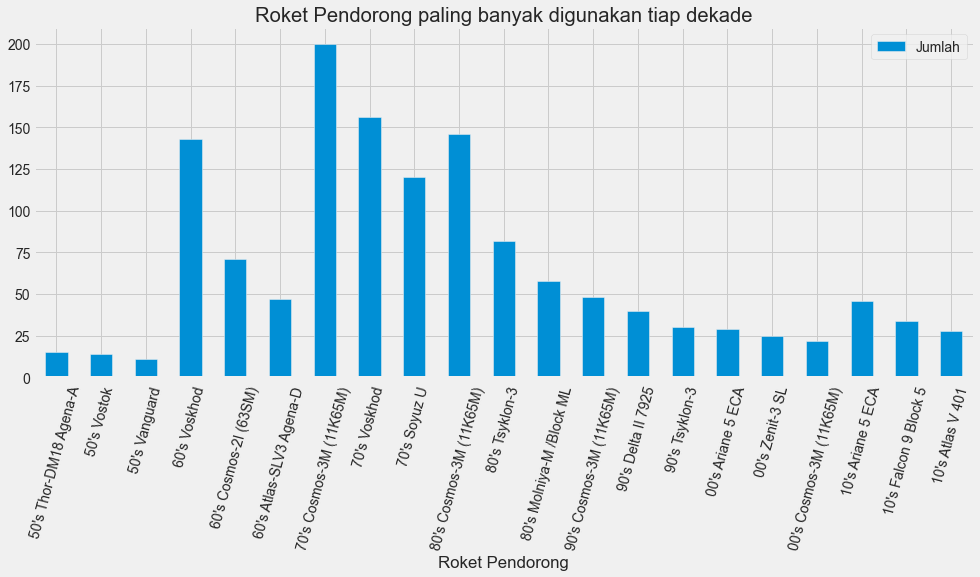

In [429]:
top3_roket_dekade.plot(kind = "bar", x = "Roket Pendorong", figsize = (15, 6),
                       rot = 75, title = "Roket Pendorong paling banyak digunakan tiap dekade")